In [1]:
import importlib
import numpy as np
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from src.object_detection import get_bounding_boxes_dino
from src import bbox_utils
importlib.reload(bbox_utils)
from src import hand_search
importlib.reload(hand_search)
from src import scene_process

In [2]:
scene_dir = Path("./data/hammer_1/scenes")

In [3]:

scene_process.process_scenes(scene_dir, "hammer")

No hands detected.
No hand bounding box found for hammer in data\hammer_1\scenes\hold_hammer_009906.jpg.
Skipping data\hammer_1\scenes\hold_hammer_009906.jpg due to no bounding boxes found.


In [4]:
render_iter = scene_dir.glob("*.npz")
path_list= list(render_iter)
len(path_list)

3

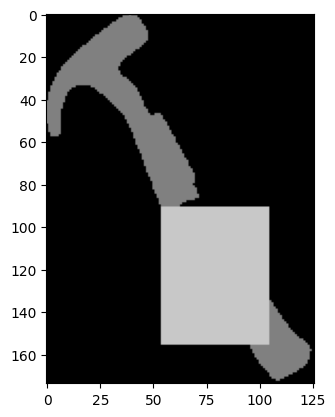

In [6]:
scene_results = np.load(path_list[0])
hand_bbox = scene_results["hand_bbox"]
object_mask = scene_results["image"]
image = bbox_utils.add_bbox_to_image(object_mask, hand_bbox)
bbox = bbox_utils.get_total_bounding_box(image, background_white=False)
croped_image_scene = bbox_utils.crop_bbox_cv2(image, bbox)
plt.imshow(croped_image_scene)